<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/deeplearningstudy/blob/main/06_%EC%9E%90%EC%84%B8%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[https://www.tensorflow.org/hub/tutorials/movenet?hl=ko](https://www.tensorflow.org/hub/tutorials/movenet?hl=ko)

# 1. 패키지 import

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !unzip /content/drive/MyDrive/data/mpii.zip -d /content/drive/MyDrive/data/mpii/

In [ ]:
module = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
movenet = module.signatures['serving_default']

# 2. Movenet의 Pose Detect 테스트

# 2-1. detect_pose 함수

In [ ]:
def detect_pose(image):

    # input_image = tf.image.resize_with_pad(image, 192, 192)
    input_image = tf.image.resize(image, [192, 192])
    input_image = tf.expand_dims(input_image, axis=0)
    input_image = tf.cast(input_image, dtype=tf.int32)

    # Run model inference
    outputs = movenet(input_image)
    keypoints = outputs['output_0'].numpy()

    return keypoints

In [ ]:
image = cv2.imread("/content/drive/MyDrive/data/mpii/train/standing/000440161.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_image = tf.convert_to_tensor(image, dtype=tf.float32)

In [ ]:
image.shape

(720, 1280, 3)

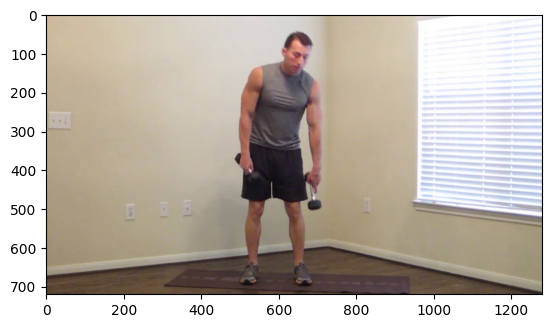

In [ ]:
plt.imshow(image)

In [ ]:
keypoints = detect_pose(input_image)

In [ ]:
print(keypoints)

[[[[0.13974392 0.50572836 0.5838551 ]
   [0.12685572 0.52042013 0.3961257 ]
   [0.12211455 0.49692297 0.41780472]
   [0.14738238 0.5328571  0.53160745]
   [0.13537097 0.47719717 0.6549177 ]
   [0.2438924  0.54226184 0.5712713 ]
   [0.21452014 0.41897783 0.7411538 ]
   [0.38935193 0.5406124  0.60599446]
   [0.36245024 0.4034286  0.72359514]
   [0.53589445 0.5391074  0.44762453]
   [0.4970054  0.39809102 0.66048753]
   [0.47720715 0.49660033 0.72859234]
   [0.47727126 0.43167585 0.8180022 ]
   [0.6813245  0.5048566  0.7194857 ]
   [0.67843056 0.4236046  0.7041327 ]
   [0.8706485  0.5142932  0.6098199 ]
   [0.8702346  0.4084913  0.48937362]]]]


In [ ]:
height, width, confidence = image.shape
height, width, confidence

(720, 1280, 3)

# 2-2. pose class 및 edge 색상 정의

In [ ]:
m = (255, 0, 255)
c = (0, 255, 255)
y = (255, 255, 0)

KEYPOINT_DICT = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

KEYPOINT_EDGES = {
    (0, 1): m,
    (0, 2): c,
    (1, 3): m,
    (2, 4): c,
    (0, 5): m,
    (0, 6): c,
    (5, 7): m,
    (7, 9): m,
    (6, 8): c,
    (8, 10): c,
    (5, 6): y,
    (5, 11): m,
    (6, 12): c,
    (11, 12): y,
    (11, 13): m,
    (13, 15): m,
    (12, 14): c,
    (14, 16): c
}

# 2-3. draw_keypoints 함수

In [ ]:
def draw_keypoints(image, keypoints):
    height, width, confidence = image.shape
    for person in keypoints[0]:
        for edge, color in KEYPOINT_EDGES.items():
            p1, p2 = edge
            y1, x1, c1 = person[p1]
            y2, x2, c2 = person[p2]
            # if c1 > 0.5 and c2 > 0.5:  # Draw lines only for keypoints with confidence > 0.5
            start_point = (int(x1 * width), int(y1 * height))
            end_point = (int(x2 * width), int(y2 * height))
            cv2.line(image, start_point, end_point, color, 2)

        for keypoint in person:
            y, x, c = keypoint
            # if c > 0.5:  # Draw only keypoints with confidence > 0.5
            cv2.circle(image, (int(x * width), int(y * height)), 5, (0, 255, 0), -1)

    return image

# 2-4. 결과 확인

In [ ]:
image_keypoints = draw_keypoints(image, keypoints)
image_keypoints.shape

(720, 1280, 3)

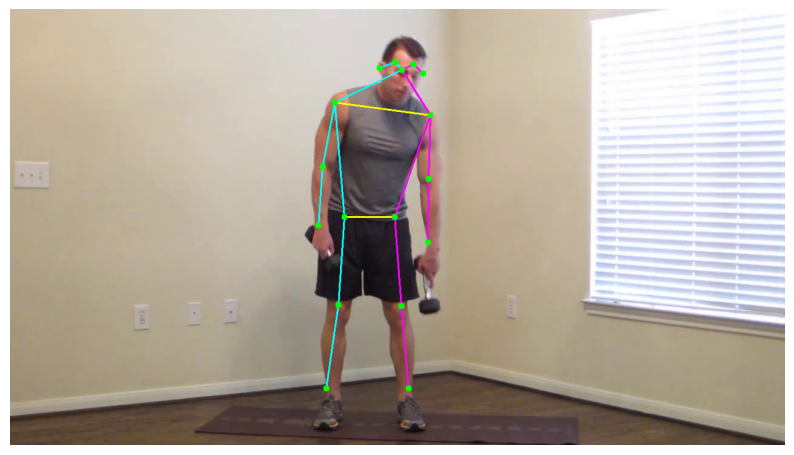

In [ ]:
plt.figure(figsize=(10, 10))
# image_keypoints = cv2.cvtColor(image_keypoints, cv2.COLOR_BGR2RGB)
plt.imshow(image_keypoints)
plt.axis('off')
plt.show()

# 3. 폴더 내 이미지 전처리

# 3-1. 폴더 내 이미지 불러오기

In [ ]:
import glob
import os
import pandas as pd

In [ ]:
train_path = '/content/drive/MyDrive/data/mpii/train'

In [ ]:
for x in os.walk(train_path):
    print(x)

('/content/drive/MyDrive/data/mpii/train', ['lying', 'standing', 'sitting'], [])
('/content/drive/MyDrive/data/mpii/train/lying', [], ['038187175.jpg', '038912301.jpg', '052700762.jpg', '034948298.jpg', '093202811.jpg', '082889711.jpg', '091356256.jpg', '020679637.jpg', '065228111.jpg', '039814928.jpg', '071366028.jpg', '017112242.jpg', '095660057.jpg', '087474365.jpg', '035378916.jpg', '012032666.jpg', '072610607.jpg', '084875270.jpg', '030980688.jpg', '023325432.jpg', '080639529.jpg', '052385561.jpg'])
('/content/drive/MyDrive/data/mpii/train/standing', [], ['028161604.jpg', '022267608.jpg', '021560906.jpg', '081068357.jpg', '039692328.jpg', '078063172.jpg', '005097207.jpg', '064447803.jpg', '008358222.jpg', '020046905.jpg', '046523932.jpg', '091642054.jpg', '098731555.jpg', '007686208.jpg', '095466636.jpg', '072597991.jpg', '058450604.jpg', '041364267.jpg', '097822067.jpg', '039011321.jpg', '084634878.jpg', '001119931.jpg', '018280003.jpg', '085458577.jpg', '084385206.jpg', '0004401

In [ ]:
train_x_path = []
train_y = []

for x in os.walk(train_path):
    if len(x[2])==0:
        continue

    name = os.path.basename(x[0])

    for file_name in x[2]:
        image_full_path = train_path + "/" + name + "/" + file_name
        train_x_path.append(image_full_path)
        train_y.append(name)

print(len(train_y))
print(len(train_x_path))
print(train_y)
print(train_x_path)

77
77
['lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting']
['/content/drive/MyDrive/data/mpii/train/lying/038187175.jpg', '/content/drive/MyDrive/data/mpii/train/lying/038912301.jpg', '/content/drive/MyDrive/data/mpii/tr

# 3-2. 학습을 위한 DataFrame 칼럼 만들기

In [ ]:
list_name = [[bodypart + '_x', bodypart + '_y', bodypart + '_score'] for bodypart in KEYPOINT_DICT]

header_name = []

for columns_name in list_name:
    header_name += columns_name

train_df = pd.DataFrame(columns=header_name)

train_df

,nose_x,nose_y,nose_score,left_eye_x,left_eye_y,left_eye_score,right_eye_x,right_eye_y,right_eye_score,left_ear_x,...,left_knee_score,right_knee_x,right_knee_y,right_knee_score,left_ankle_x,left_ankle_y,left_ankle_score,right_ankle_x,right_ankle_y,right_ankle_score


# 3-3. 이미지를 학습용으로 변환하는 make_data 함수

In [ ]:
def make_data(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    input_image = tf.convert_to_tensor(image, dtype=tf.float32)

    pose_landmarks_list = []
    keypoints = detect_pose(input_image)
    print(image.shape)

    pose_landmarks_np = np.array(keypoints[0, 0, :,:], dtype=np.float32)
    coordinates = pose_landmarks_np.flatten().astype(np.str_).tolist()

    return image, keypoints, coordinates

# 3-4. 전체 이미지를 학습용으로 변환, DF만들기

In [ ]:
for i, path in enumerate(train_x_path):
    print(i)
    image, keypoints, coordinates = make_data(path)
    train_df.loc[len(train_df)] = coordinates

    image_keypoints = draw_keypoints(image, keypoints)

    plt.figure(figsize=(10, 10))
    plt.imshow(image_keypoints)
    plt.axis('off')
    plt.show()

In [ ]:
input_df = train_df.astype('float64')

In [ ]:
train_df.shape

(77, 51)

In [ ]:
type(train_df)

pandas.core.frame.DataFrame

In [ ]:
train_df.head()

,nose_x,nose_y,nose_score,left_eye_x,left_eye_y,left_eye_score,right_eye_x,right_eye_y,right_eye_score,left_ear_x,...,left_knee_score,right_knee_x,right_knee_y,right_knee_score,left_ankle_x,left_ankle_y,left_ankle_score,right_ankle_x,right_ankle_y,right_ankle_score
0,0.62894845,0.78834885,0.47766444,0.6476637,0.8008811,0.44697878,0.64103305,0.7978491,0.58838016,0.70361805,...,0.5922233,0.6271397,0.3623216,0.43192735,0.7701628,0.18695381,0.71722186,0.6187902,0.24130741,0.7610967
1,0.6374903,0.24184644,0.20339483,0.6232636,0.22408962,0.20003197,0.6150485,0.24203804,0.173998,0.6263291,...,0.09400232,0.6305996,0.5317655,0.164445,0.7918165,0.59583807,0.19076031,0.7904434,0.5854131,0.1914052
2,0.6913537,0.8741983,0.33469227,0.67455786,0.88012457,0.37554926,0.6818602,0.877589,0.41070125,0.6493781,...,0.60926235,0.7466189,0.31292695,0.62262845,0.6408489,0.15023157,0.47100985,0.6633769,0.13754635,0.3852038
3,0.5762845,0.783343,0.51155657,0.55874634,0.78750205,0.6647538,0.5595195,0.771124,0.5934149,0.51237994,...,0.67377543,0.38615215,0.30260414,0.5909612,0.31031677,0.26675853,0.6285145,0.33177212,0.25054815,0.4858923
4,0.54060066,0.14641708,0.43218067,0.53471994,0.14102253,0.51201606,0.5422014,0.12913385,0.47483802,0.55244577,...,0.13217744,0.7401804,0.488912,0.2276178,0.63772595,0.63990664,0.20184049,0.64644,0.60305285,0.13729213


# 3-5. y 전처리(encoding)

In [ ]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
input_df = train_df.astype('float64')

In [ ]:
encoder = LabelEncoder()
train_y_enc = encoder.fit_transform(train_y)
print(train_y)
print(train_y_enc)
# 0:lying, 1:sitting, 2:standing

['lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'lying', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'standing', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting', 'sitting']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [ ]:
input_df.shape, train_y_enc.shape

((77, 51), (77,))

# 3-6. 데이터 분할

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(input_df, train_y_enc, test_size=0.30, random_state=777)

# 4. 분류분석

# 4-1. 레이어 구성

In [ ]:
# Define the model
inputs = tf.keras.Input(shape=(51,))
# embedding = landmarks_to_embedding(inputs)

layer = keras.layers.Dense(128, activation=tf.nn.relu6)(inputs)
layer = keras.layers.BatchNormalization()(layer)
layer = keras.layers.Dropout(0.3)(layer)
layer = keras.layers.Dense(64, activation=tf.nn.relu6)(layer)
layer = keras.layers.BatchNormalization()(layer)
layer = keras.layers.Dropout(0.3)(layer)
outputs = keras.layers.Dense(3, activation="softmax")(layer)

model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 51)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,875 (62.01 KB)

 Trainable params: 15,491 (60.51 KB)

 Non-trainable params: 384 (1.50 KB)

# 4-2. 모델 설계

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Add a checkpoint callback to store the checkpoint that has the highest
# validation accuracy.
checkpoint_path = "best_model.keras"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30)

# 4-3. 모델 학습

In [ ]:
# Start training
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, earlystopping])

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.3619 - loss: 2.1505
Epoch 1: val_loss improved from inf to 1.11636, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 858ms/step - accuracy: 0.3499 - loss: 2.1516 - val_accuracy: 0.3333 - val_loss: 1.1164
Epoch 2/200
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 1.6411
Epoch 2: val_loss improved from 1.11636 to 1.10226, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4127 - loss: 1.5559 - val_accuracy: 0.3750 - val_loss: 1.1023
Epoch 3/200
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5000 - loss: 1.2433
Epoch 3: val_loss improved from 1.10226 to 1.08680, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4686 - loss: 1.3821 - val_accuracy: 0.4167 - val_loss: 1.0868
Epoch 4/200
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5000 - loss: 1.1558
Epoch 4: val_loss improved from 1.08680 to 1.07266, saving model to b

# 4-4. 학습 결과 시각화

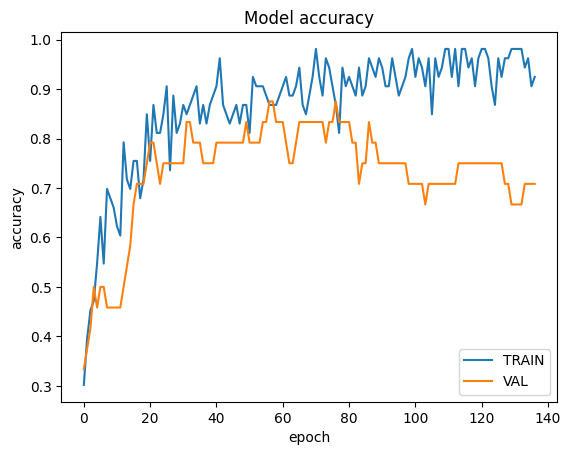

In [ ]:
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

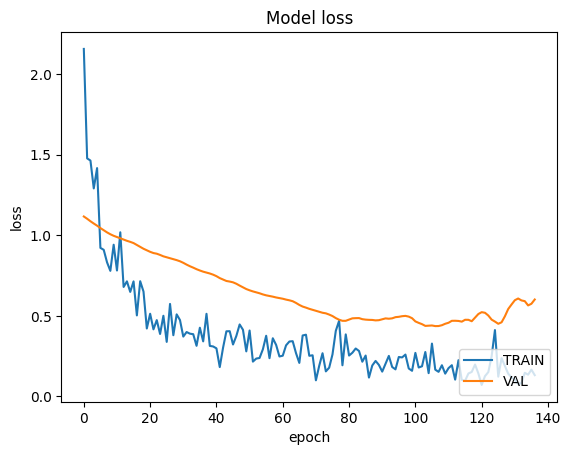

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

# 4-5. 인터넷 이미지를 활용한 검증

In [ ]:
test_image_url = "https://img.animalplanet.co.kr/news/2020/09/07/700/1kzey880196j71pqyro6.jpg"
!wget -O image.jpeg {test_image_url}
image, keypoints, coordinates = make_data("image.jpeg")

--2025-06-04 01:14:34--  https://img.animalplanet.co.kr/news/2020/09/07/700/1kzey880196j71pqyro6.jpg
Resolving img.animalplanet.co.kr (img.animalplanet.co.kr)... 222.235.64.106
Connecting to img.animalplanet.co.kr (img.animalplanet.co.kr)|222.235.64.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30061 (29K) [image/jpeg]
Saving to: ‘image.jpeg’

image.jpeg          100%[===================>]  29.36K  --.-KB/s    in 0.1s    

2025-06-04 01:14:35 (208 KB/s) - ‘image.jpeg’ saved [30061/30061]

(440, 700, 3)


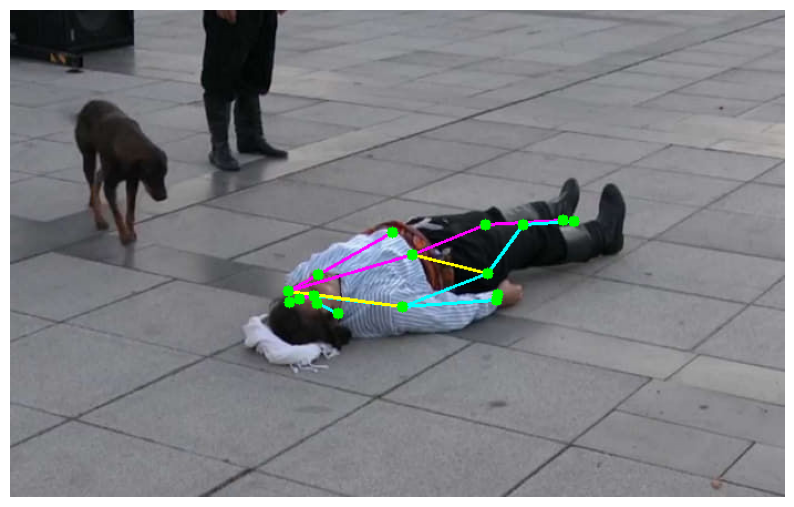

In [ ]:
image_keypoints = draw_keypoints(image, keypoints)

plt.figure(figsize=(10, 10))
plt.imshow(image_keypoints)
plt.axis('off')
plt.show()

# keypoints간 거리 feature 추가, 다른 알고리즘

In [ ]:
X_test = np.array(coordinates, dtype='float32').reshape(-1,51)
pred = model.predict(X_test)
print(pred)
predicted_class_index = pred.argmax(axis=1)[0]
print(predicted_class_index)
class_labels = sorted(set(train_y))
print(class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[9.8147821e-01 1.4001541e-04 1.8381691e-02]]
0
lying
